### ODEs with discontinuous forcing functions

A mixing tank initially contains 300 g of salt mixed into 1000 L of water. At t=0 min, a solution of 4 g/L salt enters the tank at 6 L/min. At t=10 min, the solution is changed to 2 g/L salt, still entering at 6 L/min. The tank is well stirred, and the tank solution leaves at a rate of 6 L/min. Plot the concentration of salt (g/L) in the tank as a function of time.

A mass balance on the salt in the tank leads to this differential equation:

$$\frac{dM_S}{dt} = \nu C_{S,in}(t) - \nu \frac{M_S}{V}$$

 with the initial condition that $M_s$ (t=0) = 300

The wrinkle is that the inlet conditions are not constant.

\begin{align*}
C_{S_{\text{in}}}(t) = \begin{cases}
0.0\, \text{g/L} & \text{if } t < 0 \\
4.0\, \text{g/L} & \text{if } t > 0 \text{ and } t \leq 10 \\
2.0\, \text{g/L} & \text{otherwise}
\end{cases}
\end{align*}

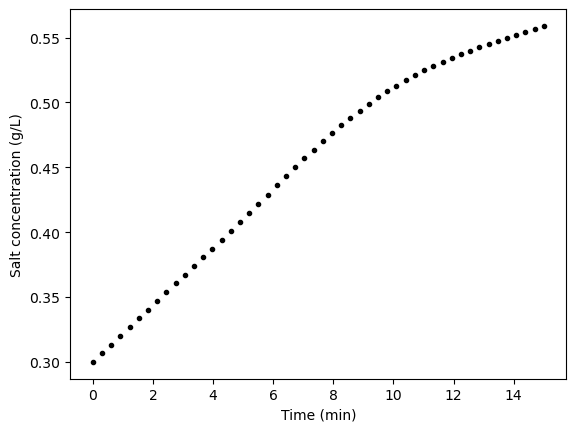

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

V = 1000.0  # L
nu = 6.0    # L/min

def Cs_in(t):
    'Inlet concentration'
    if t < 0:
        Cs = 0.0  # g/L
    elif (t > 0) and (t <= 10):
        Cs = 4.0
    else:
        Cs = 2.0
    return Cs

def mass_balance(t, Ms):
    dMsdt = nu * Cs_in(t) - (nu * Ms) / V
    return dMsdt

tspan = (0.0, 15.0)
M0 = [300.0]  # gm salt, as a list
solution = solve_ivp(mass_balance, tspan, M0, t_eval=np.linspace(tspan[0], tspan[1], 50))

t_results = solution.t
Ms_results = solution.y[0] / V  # Normalize by V to get salt concentration

plt.plot(t_results, Ms_results, 'k.')
plt.xlabel('Time (min)')
plt.ylabel('Salt concentration (g/L)')
plt.show()